<a href="https://colab.research.google.com/github/leticiaram/RIIAA_2021/blob/main/notebooks/Redes_ModelosEpi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#para clonar repositorio
!git clone https://github.com/leticiaram/RIIAA_2021.git

# Redes_Networkx

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Red ejemplo: club de karate de Zachary

Una de las redes listas para usar disponibles en NetworkX: "el club de karate de Zachary"(Zachary, 1977). Esta red representa las amistades (arcos) entre  miembros (nodos) de un club de karate estudiado entre 1970 y 1972. Este club de karate en particular ha sido de interés durante mucho tiempo para los sociólogos y científicos de la red, porque finalmente se dividió en dos clubes diferentes después de un desacuerdo entre el instructor y el presidente del club (esto podría explicar por qué no hay estudios famosos sobre clubes de resolución de conflictos). En el estudio original, Zachary usó la estructura de la red para predecir qué miembros se unirían a cuál de los dos clubes con una precisión casi perfecta. Específicamente, usó el algoritmo de corte mínimo. En el artículo de Zachary, el nodo con el ID 0 se identificó como el instructor del club. 

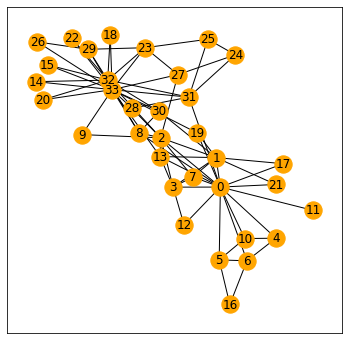

In [2]:
G = nx.karate_club_graph()
plt.figure(1,figsize=(6,6))
nx.draw_networkx(G,node_color="orange")

### Nodos y Aristas

In [3]:
list(G.nodes)[0:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
list(G.edges)[0:10]

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11)]

### Diametro

In [7]:
nx.diameter(G)

5

### Coeficiente de agrupamiento

In [5]:
nx.clustering(G)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

In [8]:
nx.average_clustering(G)

0.5706384782076823

### Centralidad

#### De grado

In [9]:
G.degree

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

<BarContainer object of 11 artists>

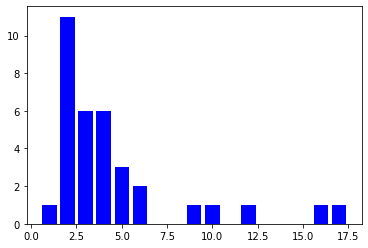

In [11]:
degree_sequence=sorted([d for n,d in G.degree()], reverse=True) 
import collections
degreeCount=collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color='b')

In [10]:
max(G.degree)

(33, 17)

#### Eigen centralidad


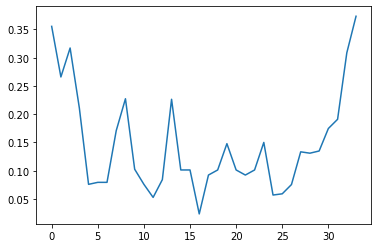

In [12]:
ec=nx.eigenvector_centrality(G, max_iter=10000)
lists = sorted(ec.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)

In [13]:
max(nx.eigenvector_centrality(G, max_iter=10000))

33

### Asortatividad

In [14]:
nx.degree_assortativity_coefficient(G)

-0.47561309768461413

## Grafos Aleatorios

### Erdös-Rényi G(n,m)




Dado un número entero 𝑛 y una valor 𝑚 ∈ {0,1,…,𝑛(𝑛−1)/2}, este grafo se denota como 𝐺(𝑛,𝑚) y corresponde al grafo simple de 𝑛 vértices donde cada uno de los 𝑚 arcos es aleatoriamente asignado entre cualesquiera dos diferentes vértices.

La única restricción, durante el proceso de construcción, es que un arco no puede conectar a dos vértices que ya están conectados.

El número de arcos 𝑚, es un número fijo, pero el grafo resultante es seleccionado aleatoriamente de todos los grafos que tienen 𝑚 arcos.

¿Esto significa que los grafos resultantes son isomorfos?

In [15]:
n = 10  # vertices
m = 20  # arcos
seed = 2016  # semilla para generador de números aleatorios

G = nx.gnm_random_graph(n, m, seed=seed)

print("Lista de Adyacencias")
for line in nx.generate_adjlist(G):
    print(line)

Lista de Adyacencias
0 9 5 6
1 4 7 8 6 2
2 4 5 7
3 5 4 6 9
4 9 7
5 7
6
7 8
8 9
9


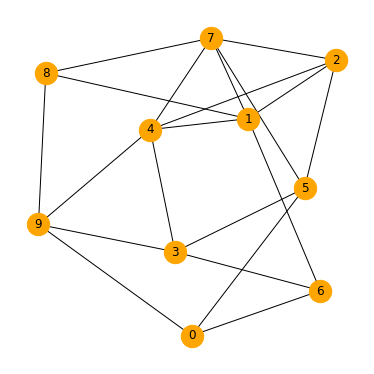

In [16]:
plt.figure(1,figsize=(5,5))
pos = nx.spring_layout(G, seed=seed)  #para mantener la misma posición
nx.draw(G, with_labels=True,node_color="orange",pos=pos,node_size=500)
plt.show()

In [17]:
print("Matriz de Adyacencias")
A = nx.to_numpy_matrix(G)
A

Matriz de Adyacencias


matrix([[0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
        [0., 0., 1., 0., 1., 0., 1., 1., 1., 0.],
        [0., 1., 0., 0., 1., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
        [0., 1., 1., 1., 0., 0., 0., 1., 0., 1.],
        [1., 0., 1., 1., 0., 0., 0., 1., 0., 0.],
        [1., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 1., 1., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
        [1., 0., 0., 1., 1., 0., 0., 0., 1., 0.]])

### Erdös-Rényi G(n,p)

Dado un número entero 𝑛 y una valor 𝑝 ∈ (0,1), este grafo se denota como 𝐺(𝑛,𝑝) y corresponde al grafo simple de 𝑛 vértices donde cada arco entre dos vértices está presente con probabilidad 𝑝.

Es decir, cada uno de los 𝑛(𝑛−1)/2 posibles arcos en la red, 'tiramos una moneda' cuya probabilidad de 'sol' es 𝑝. Si el resultado es 'sol' entonces añadimos el arco a la red.

El número de arcos es aleatorio, pero ¿Cuál es el número esperado de éstos?
Los grados de cada vértice también son aleatorios. ¿Puedes decir cuál es su distribución exacta?

¿Sabes cuál es su distribución aproximada cuando 𝑛→∞ y 𝑛𝑝→𝜆>0?

In [18]:
n = 10  # vertices
p = 0.5  # probability
seed = 2016  # semilla para generador de números aleatorios

G = nx.gnp_random_graph(n, p, seed=seed)

print("Lista de Adyacencias")
for line in nx.generate_adjlist(G):
    print(line)


Lista de Adyacencias
0 2 5 8 9
1 2 3 4 5 6 7 8 9
2 3 5 7
3 5 7 8
4 5 7 9
5 8
6 7 8
7 8
8 9
9


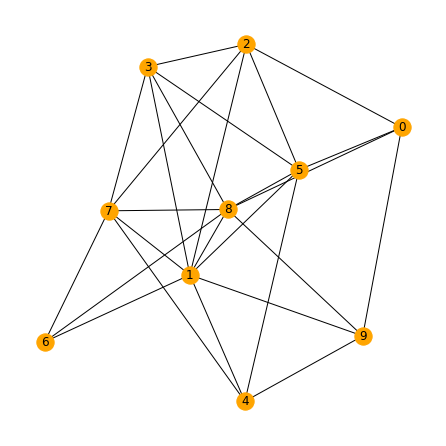

In [19]:
pos = nx.spring_layout(G, seed=seed)  #para mantener la misma posición
plt.figure(1,figsize=(6,6))
nx.draw(G, with_labels=True,node_color="orange",pos=pos)
plt.show()

### Barabasi-Albert

* Es un algoritmo de tipo evolutivo.
* El proceso se denomina de 'conexión preferencial' (preferential attachment) y se conoce como el proceso de 'los ricos se vuelven más ricos'.
* Genera redes aleatorias libres de escala (scale free). Las redes generadas poseen una distribución de grado de tipo potencial y son muy frecuentes en los sistemas elaborados por el ser humano así como en la naturaleza. Por ejemplos: El internet, redes de citas, y algunas redes sociales, redes eléctricas.
------
* Crecimiento: comienzando con un número pequeño de vértices ($𝑚_0$) y cada uno con grado de al menos 1. En cada paso añadimos un vértice con 𝑚 ≤ $𝑚_0$
arcos incidentes que se usan para conectarlo con los vértices ya presentes.
* Conexión Preferencial: Escoger los vértices a los que el nuevo se conecta, se realiza con un muestreo ponderado donde la probabilidad de conectarse al vértice 𝑖, con grado $𝑘_𝑖$  es $𝑘_𝑖$/∑𝑗𝑘𝑗.
* Despues de 𝑡 pasos, el agoritmo resulta en una red con 𝑛 = 𝑡 + $𝑚_0$ vértices y 𝑚𝑡 arcos.


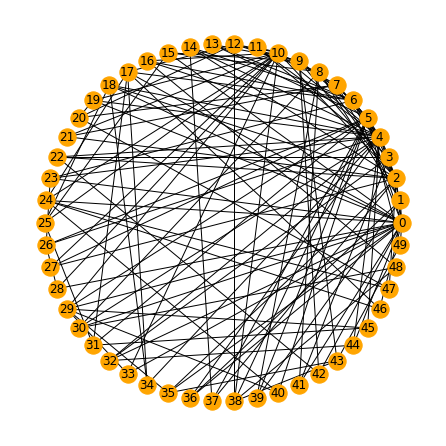

In [21]:
n = 50  # nodos
m = 3  # numero de arcos vertices de cada nuevo nodo
seed = 2016  # semilla para generador de números aleatorios

G = nx.barabasi_albert_graph(n, m, seed=seed)
pos = nx.circular_layout(G)  # posicion circular
plt.figure(1,figsize=(6,6))
nx.draw(G, with_labels=True,node_color="orange",pos=pos)
plt.show()

### Watts-Strogatz

* Es un algoritmo de tipo evolutivo.
* La distribución de grado de los grafos generados mediante este algoritmo depende del valor del parámetro 𝑝.
* Comienza con un anillo, donde cada vértice está conectado a los siguientes 𝑧
vértices
* En cada paso se selecciona uno de los vértices sus arcos incidentes se reconectan con el siguiente esquema. Sea ($𝑣_𝑖$,$𝑣_𝑗$) uno de los arcos del vértice 𝑣𝑖 seleccionado. Con probabilidad 𝑝 éste se remueve y se substituye por el arco (𝑣𝑖,𝑣𝑟), donde 𝑣𝑟 es seleccionado aleatoriamente del conjunto 𝑉∖$v_i$.

In [25]:
n = 20  # vertices
k = 4   # número de vecionos más cercanos a los que está conectado
p = 0.3   # probabilidad de reconexión
seed = 2016  # semilla para generador de números aleatorios

G = nx.watts_strogatz_graph(n, k, p,seed=seed)


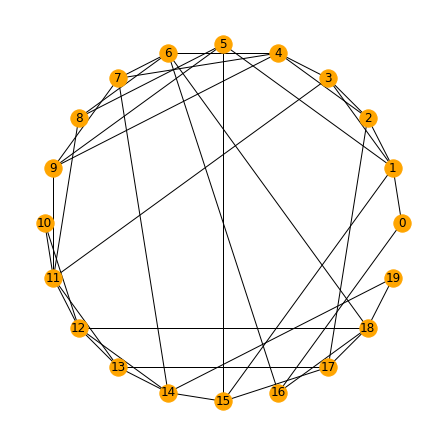

In [26]:
plt.figure(1,figsize=(6,6))
pos = nx.circular_layout(G)  # posición circular
nx.draw(G, with_labels=True,node_color="orange",pos=pos)
plt.show()

### Modelo de Configuración para generar redes

In [49]:
![ConfMod](https://raw.githubusercontent.com/leticiaram/RIIAA_2021/master/figs/ConfigurationModel.png)


/bin/bash: -c: line 0: syntax error near unexpected token `https://raw.githubusercontent.com/leticiaram/RIIAA_2021/master/figs/ConfigurationModel.png'
/bin/bash: -c: line 0: `[ConfMod](https://raw.githubusercontent.com/leticiaram/RIIAA_2021/master/figs/ConfigurationModel.png)'


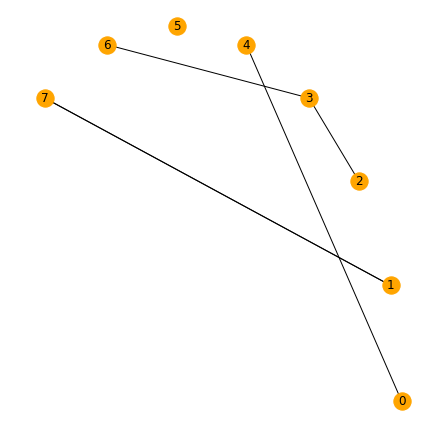

In [27]:
ks=[1,2,1,2,1,0,1,2]
G = nx.configuration_model(ks)
plt.figure(1,figsize=(6,6))
nx.draw(G, with_labels=True,node_color="orange",pos=pos)
plt.show()

In [30]:
import numpy as np
np.random.seed(4)
k = np.random.poisson(5, 100)  #generamos 100 vertices con grado Poisson(5)
print("Sucesión de Grados")
print(k)
sg = k.tolist()
print("La suma de grados debe ser par")
print(sum(sg))
G = nx.configuration_model(sg)

Sucesión de Grados
[ 7  6  1  5  4  6  8  7  5  9  6  5  7  6  5  8  2 11  2  7  4  8  4  7
  5  7  3  4  8  5  4  4  5 11  4  3  5  4  3  3  5  6  5  8  7  5  7  3
  3  3  4  8  6  6  2  3  3  9  9  6 11  3  3  5  3  7  5  5  5  4  8  3
  8  6 11  6  8  9  3  4  2  1  4  6  1  7  6  2  7  7  7  1  5  4  3  5
  2  1  6  2]
La suma de grados debe ser par
522


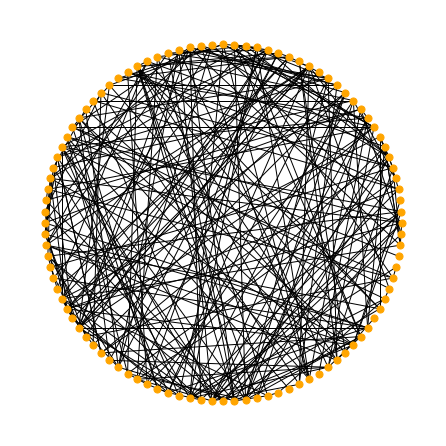

In [29]:
plt.figure(1,figsize=(6,6))
nx.draw(G, with_labels=False,node_color="orange",pos=nx.circular_layout(G),node_size=50)

<BarContainer object of 10 artists>

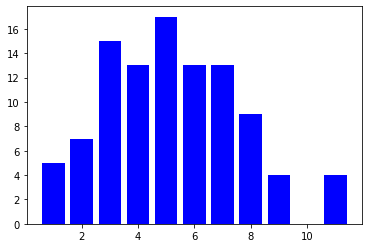

In [31]:
degree_sequence = sorted([d for n,d in G.degree()], reverse=True) 
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color='b')

# Modelos Epidemiológicos en Redes de contactos

## Modelos Epidemiológicos compartimentales

## Simulación de brotes epidemiológicos en redes

In [33]:
!pip install EoN

     |████████████████████████████████| 113 kB 5.0 MB/s 
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120819 sha256=1438581fea5265ae13a391d722e3ea3a9e8dbdc960943110425ae0df32ea8b83
  Stored in directory: /root/.cache/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built EoN


In [34]:
import EoN

### Ejemplo: SIR en red Barabasi-Albert

EoN es un módulo de Python que permite realizar simuaciones de modelos compartmentales SIS y SIR estocásticos en redes con algoritmos como Guillespie y simulaciones basadas en eventos (event-based simulations) y en tiempo discreto o continuo. 
[Liga al módulo EoN](https://epidemicsonnetworks.readthedocs.io/en/latest/EoN.html)


Creamos una red aleatoria (Barabasi-Albert en este ejemplo) con N vertices 

In [37]:
N=10**5   #cien mil nodos
G=nx.barabasi_albert_graph(N, 5)  # Red aleatoria

1446


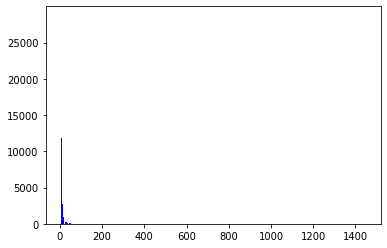

In [38]:
degree_sequence = sorted([d for n,d in G.degree()], reverse=True) 
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color='b')
print(max(deg))

In [ ]:
tmax = 20
iterations = 5   #run 5 simulations
tau = 0.1        #transmission rate
gamma = 1.0      #recovery rate
rho = 0.005      #random fraction initially infected

for counter in range(iterations): #run simulations
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)

# Now compare with ODE predictions.  Read in the degree distribution of G
#and use rho to initialize the various model equations.
#There are versions of these functions that allow you to specify the
#initial conditions rather than starting from a graph.

#we expect a homogeneous model to perform poorly because the degree
#distribution is very heterogeneous
t, S, I, R = EoN.SIR_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 2)
  
#meanfield models will generally overestimate SIR growth because they
#treat partnerships as constantly changing.
t, S, I, R = EoN.SIR_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 2)
   
#The EBCM model does not account for degree correlations or clustering
t, S, I, R = EoN.EBCM_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '--', label = 'EBCM approximation', linewidth = 2)
    
#the preferential mixing model captures degree correlations.
t, S, I, R = EoN.EBCM_pref_mix_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, label = 'Pref mix EBCM', linewidth=5, dashes=[4, 2, 1, 2, 1, 2])
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()